In [789]:
import numpy as np
import pandas as pd
import uproot as up 
import os
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as mcolors
from matplotlib.path import Path
from matplotlib.collections import LineCollection
import imageio.v2 as imageio  # v2 pour éviter des warnings
from natsort import natsorted
print(os.getcwd())
%load_ext autoreload
%autoreload 2

import my_functions as fct

from IPython.core.interactiveshell import InteractiveShell #Pour controler l'affichage des outputs des cellules

show_all_output = False

if show_all_output :
    InteractiveShell.ast_node_interactivity = "all"
else :
    InteractiveShell.ast_node_interactivity = "last_expr"

/Users/antoinevezon/Desktop/bruit_de_fond/Analyse
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Déclaration des variables utiles

In [790]:
Adc_to_mV = 0.29175
Qt2t_to_pC = 0.16699

on_lab_desktop = False
on_my_laptop = not on_lab_desktop

plot = True
save = False
GIF_gen = False

if GIF_gen:
    plot = False

if save == True :
    if on_lab_desktop == True:
        save_dir_path = "/home/vezon/Bureau/RHB2/fig_New_plast"
    if on_my_laptop == True:
        #save_dir_path = "/Users/antoinevezon/Desktop/M2_PFA/Stage_M2/Ordi_lab/RHB2/Figure_analyse_acq"
        save_dir_path = "/Users/antoinevezon/Desktop/PLOT_STOCK/New_plastics_atleastGAD_1500mbar"

else :
    save_dir_path = None

print_df = True
print_df_clean = True
print_df_sat_ch = False
print_df_nosat_ch = False
print_df_sat_all = False
print_df_nosat = False

# Choix du fichier root à analyser 

In [791]:
rootfile_name_a = "GorG2orG4orG24.root"
rootfile_name_b = "GorG2orG4orG24_V2.root"
rootfile_name_c = "GorG2orG4orG24_100ns.root"
rootfile_name_d = "1bar_GorG2orG4orG24.root"
rootfile_name_e = "1bar_GorG2orG4orG24_10cm.root"
rootfile_name_f = "1.5bar_GorG2orG4orG24.root"
rootfile_name_g = "coind_10h_close.root"
rootfile_name_h = "coind_10h_vertical_close.root"
rootfile_name_i = "10h_coind_vert_close_2.root"
rootfile_name_j = "mult2_24567_long.root"
rootfile_name_k = "mult2_24567_long_TrigW50.root"
rootfile_name_l = "coind_10h_3PMP.root"
rootfile_name_m = "coind_10h_3PMP_200ns.root"

rootfile_name_n = "New_plastics_atleastGAD_500mbar.root"  # \
rootfile_name_o = "New_plastics_atleastGAD_1000mbar.root" #  |--> QDC_2 = Right_plastic & QDC_4 = Left_plastic ! Il faut les échanger pour etre identique à Empty  
rootfile_name_p = "New_plastics_atleastGAD_1500mbar.root" # /
rootfile_name_q = "New_plastics_atleastGAD_Empty.root"
rootfile_name_r = "New_plastics_atleastGAD_Empty_V2.root"

##################################
rootfile_use = rootfile_name_q
##################################

# Lecture du DataTree

In [792]:
if on_lab_desktop == True:
    path_to_DataTree_1 = f"/home/vezon/Bureau/RHB2/{rootfile_use}:DataTree;1"
if on_my_laptop == True:
    path_to_DataTree_1 = f"/Users/antoinevezon/Desktop/M2_PFA/Stage_M2/Ordi_lab/RHB2/{rootfile_use}:DataTree;1"
        
DataTree_1 = up.open(path_to_DataTree_1)

DataTree_1.show()

name                 | typename                 | interpretation                
---------------------+--------------------------+-------------------------------
group_time           | double                   | AsDtype('>f8')
QDC_2                | int32_t                  | AsDtype('>i4')
QDC_4                | int32_t                  | AsDtype('>i4')
QDC_2_sat            | bool                     | AsDtype('bool')
QDC_4_sat            | bool                     | AsDtype('bool')
QDC_2_q2             | int32_t                  | AsDtype('>i4')
QDC_4_q2             | int32_t                  | AsDtype('>i4')
QDC_2_q2_sat         | bool                     | AsDtype('bool')
QDC_4_q2_sat         | bool                     | AsDtype('bool')
QT2T_5_q             | int32_t                  | AsDtype('>i4')
QT2T_6_q             | int32_t                  | AsDtype('>i4')
QT2T_7_q             | int32_t                  | AsDtype('>i4')
QT2T_5_width         | int32_t                  | AsDt

# DataTree en Dataframe

In [793]:
df = DataTree_1.arrays(["group_time","QDC_2","QDC_4","QT2T_5_q","QT2T_6_q","QT2T_7_q"
                      ,"Counter_2","Counter_4","Counter_5","Counter_6","Counter_7"
                      ,"Counter_mult_2","Counter_mult_4","Counter_mult_5","Counter_mult_6","Counter_mult_7"
                      ,"QT2T_5_max_amp","QT2T_6_max_amp","QT2T_7_max_amp"
                      ,"QT2T_5_q_base_line","QT2T_6_q_base_line","QT2T_7_q_base_line" 
                      ,"QDC_2_sat","QDC_4_sat","QT2T_5_sat","QT2T_6_sat","QT2T_7_sat"], library="pd")
df

,group_time,QDC_2,QDC_4,QT2T_5_q,QT2T_6_q,QT2T_7_q,Counter_2,Counter_4,Counter_5,Counter_6,...,QT2T_6_max_amp,QT2T_7_max_amp,QT2T_5_q_base_line,QT2T_6_q_base_line,QT2T_7_q_base_line,QDC_2_sat,QDC_4_sat,QT2T_5_sat,QT2T_6_sat,QT2T_7_sat
0,8.523387e+08,-999999,29162,280,23202,18998,0,1,1,1,...,3195,3181,-9,6,-5,False,False,False,True,True
1,4.995414e+09,-999999,-999999,146,521,79,0,0,1,1,...,119,41,33,13,53,False,False,False,False,False
2,8.096720e+09,-999999,-999999,274,177,118,0,0,1,1,...,49,42,-13,-6,21,False,False,False,False,False
3,8.412110e+09,-999999,-999999,354,559,21046,0,0,1,1,...,117,3309,16,16,34,False,False,False,False,True
4,1.187954e+10,-999999,-999999,489,10207,302,0,0,1,1,...,1719,74,1,31,4,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
176670,3.264343e+14,-999999,-999999,307,229,17826,0,0,1,1,...,64,3113,2,6,10,False,False,False,False,True
176671,3.264370e+14,506,-999999,27559,933,900,1,0,1,1,...,186,186,8,12,-3,False,False,True,False,False
176672,3.264375e+14,-999999,-999999,337,8318,36,0,0,1,1,...,1311,36,31,6,88,False,False,False,False,False
176673,3.264387e+14,-999999,-999999,201,2780,586,0,0,1,1,...,514,131,31,-9,-15,False,False,False,False,False


# Echange du CONTENU de QCD_2 et QCD_4  (sans échanger le nom des col) pour les acquisitions de Victor. 

Il vaut mieux "and" que "&" pour les test logiques sur des strings.Mon code fonctionne avec "&" ici parce que je manipule deux booléens simples, mais la bonne pratique reste d’utiliser "and" pour les : if ... and ... 

In [794]:
if rootfile_use.startswith("New_plastics_atleastGAD_") and rootfile_use.endswith("mbar.root"):
    
    print("Avant échange:", df[["QDC_2", "QDC_4"]].head())  
    
    stock1 = df["QDC_2"].copy() #on stock une copie de QDC_2
    df["QDC_2"] = df["QDC_4"]
    df["QDC_4"] = stock1
    
    print("Aprés échange:", df[["QDC_2", "QDC_4"]].head())

    stock2 = df["Counter_2"].copy()
    df["Counter_2"] = df["Counter_4"]                                                                 
    df["Counter_4"] = stock2

    stock2 = df["Counter_mult_2"].copy()
    df["Counter_mult_2"] = df["Counter_mult_4"]                                                                 
    df["Counter_mult_4"] = stock2

    stock2 = df["QDC_2_sat"].copy()
    df["QDC_2_sat"] = df["QDC_4_sat"]                                                                 
    df["QDC_4_sat"] = stock2
df
#print("df_descibr :",df.describe())
#print("df.index",df.index, "\n df.columns",df.columns)
#df.loc[row,column]

,group_time,QDC_2,QDC_4,QT2T_5_q,QT2T_6_q,QT2T_7_q,Counter_2,Counter_4,Counter_5,Counter_6,...,QT2T_6_max_amp,QT2T_7_max_amp,QT2T_5_q_base_line,QT2T_6_q_base_line,QT2T_7_q_base_line,QDC_2_sat,QDC_4_sat,QT2T_5_sat,QT2T_6_sat,QT2T_7_sat
0,8.523387e+08,-999999,29162,280,23202,18998,0,1,1,1,...,3195,3181,-9,6,-5,False,False,False,True,True
1,4.995414e+09,-999999,-999999,146,521,79,0,0,1,1,...,119,41,33,13,53,False,False,False,False,False
2,8.096720e+09,-999999,-999999,274,177,118,0,0,1,1,...,49,42,-13,-6,21,False,False,False,False,False
3,8.412110e+09,-999999,-999999,354,559,21046,0,0,1,1,...,117,3309,16,16,34,False,False,False,False,True
4,1.187954e+10,-999999,-999999,489,10207,302,0,0,1,1,...,1719,74,1,31,4,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
176670,3.264343e+14,-999999,-999999,307,229,17826,0,0,1,1,...,64,3113,2,6,10,False,False,False,False,True
176671,3.264370e+14,506,-999999,27559,933,900,1,0,1,1,...,186,186,8,12,-3,False,False,True,False,False
176672,3.264375e+14,-999999,-999999,337,8318,36,0,0,1,1,...,1311,36,31,6,88,False,False,False,False,False
176673,3.264387e+14,-999999,-999999,201,2780,586,0,0,1,1,...,514,131,31,-9,-15,False,False,False,False,False


# -999999 to NaN


In [795]:

df_clean=df.where(df != -999999)

df_clean


,group_time,QDC_2,QDC_4,QT2T_5_q,QT2T_6_q,QT2T_7_q,Counter_2,Counter_4,Counter_5,Counter_6,...,QT2T_6_max_amp,QT2T_7_max_amp,QT2T_5_q_base_line,QT2T_6_q_base_line,QT2T_7_q_base_line,QDC_2_sat,QDC_4_sat,QT2T_5_sat,QT2T_6_sat,QT2T_7_sat
0,8.523387e+08,NaN,29162.0,280,23202,18998,0,1,1,1,...,3195,3181,-9,6,-5,False,False,False,True,True
1,4.995414e+09,NaN,NaN,146,521,79,0,0,1,1,...,119,41,33,13,53,False,False,False,False,False
2,8.096720e+09,NaN,NaN,274,177,118,0,0,1,1,...,49,42,-13,-6,21,False,False,False,False,False
3,8.412110e+09,NaN,NaN,354,559,21046,0,0,1,1,...,117,3309,16,16,34,False,False,False,False,True
4,1.187954e+10,NaN,NaN,489,10207,302,0,0,1,1,...,1719,74,1,31,4,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
176670,3.264343e+14,NaN,NaN,307,229,17826,0,0,1,1,...,64,3113,2,6,10,False,False,False,False,True
176671,3.264370e+14,506.0,NaN,27559,933,900,1,0,1,1,...,186,186,8,12,-3,False,False,True,False,False
176672,3.264375e+14,NaN,NaN,337,8318,36,0,0,1,1,...,1311,36,31,6,88,False,False,False,False,False
176673,3.264387e+14,NaN,NaN,201,2780,586,0,0,1,1,...,514,131,31,-9,-15,False,False,False,False,False


# AJOUT DE LA COLONNE QT2T_sum_q APRES QT2T_7_q

Attention: si on utilise df["QT2T_sum_q"] = df["QT2T_5_q"] + df["QT2T_6_q"] + df["QT2T_7_q"] 
    car si ne serait-ce qu'un QT2T_n_q = NaN la somme sur cette ligne vaut NaN (pas notre cas car on a "at least G")
   Si necessaire utiliser df["QT2T_sum_q"] = df[["QT2T_5_q", "QT2T_6_q", "QT2T_7_q"]].sum(axis=1)
    qui accepte les sommes partielles avec des NaN qui sont juste ignorait (i.e = 0)

In [796]:
col_7q = df_clean.columns.get_loc("QT2T_7_q") #numero de colonne de 0 à n-1

df_clean.insert(loc=col_7q+1, column="QT2T_sum_q",value=df_clean[["QT2T_5_q", "QT2T_6_q", "QT2T_7_q"]].sum(axis=1))

df_clean.filter(like="_q").head()


,QT2T_5_q,QT2T_6_q,QT2T_7_q,QT2T_sum_q,QT2T_5_q_base_line,QT2T_6_q_base_line,QT2T_7_q_base_line
0,280,23202,18998,42480,-9,6,-5
1,146,521,79,746,33,13,53
2,274,177,118,569,-13,-6,21
3,354,559,21046,21959,16,16,34
4,489,10207,302,10998,1,31,4


# AJOUT DE LA COLONNE QDC_sum APRES QDC_4 

In [797]:
col_4qdc = df_clean.columns.get_loc("QDC_4")

df_clean.insert(loc=col_4qdc+1, column="QDC_sum",value=df_clean[["QDC_2","QDC_4"]].sum(axis=1))

df_clean.filter(like="QDC").head()
df_clean.filter(like="_").head()


,group_time,QDC_2,QDC_4,QDC_sum,QT2T_5_q,QT2T_6_q,QT2T_7_q,QT2T_sum_q,Counter_2,Counter_4,...,QT2T_6_max_amp,QT2T_7_max_amp,QT2T_5_q_base_line,QT2T_6_q_base_line,QT2T_7_q_base_line,QDC_2_sat,QDC_4_sat,QT2T_5_sat,QT2T_6_sat,QT2T_7_sat
0,8.523387e+08,NaN,29162.0,29162.0,280,23202,18998,42480,0,1,...,3195,3181,-9,6,-5,False,False,False,True,True
1,4.995414e+09,NaN,NaN,0.0,146,521,79,746,0,0,...,119,41,33,13,53,False,False,False,False,False
2,8.096720e+09,NaN,NaN,0.0,274,177,118,569,0,0,...,49,42,-13,-6,21,False,False,False,False,False
3,8.412110e+09,NaN,NaN,0.0,354,559,21046,21959,0,0,...,117,3309,16,16,34,False,False,False,False,True
4,1.187954e+10,NaN,NaN,0.0,489,10207,302,10998,0,0,...,1719,74,1,31,4,False,False,False,False,False


# AJOUT DE LA COLONNE QT2T_sum_max_amp APRES QT2T_7_max_amp 

In [798]:
col_7a = df_clean.columns.get_loc("QT2T_7_max_amp") 

df_clean.insert(loc=col_7a+1, column="QT2T_sum_max_amp",value=df_clean[["QT2T_5_max_amp", "QT2T_6_max_amp", "QT2T_7_max_amp"]].sum(axis=1))

# AJOUT DE LA COLONNE Counter_sum APRES Counter_7

In [799]:
col_c7 = df_clean.columns.get_loc("Counter_7") 

df_clean.insert(loc=col_c7+1, column="Counter_sum",value=df_clean[["Counter_5", "Counter_6", "Counter_7"]].sum(axis=1))

# AJOUT DE LA COLONNE Counter_mult_sum APRES Counter_mult_7

In [800]:
col_cm7 = df_clean.columns.get_loc("Counter_mult_7") 

df_clean.insert(loc=col_cm7+1, column="Counter_mult_sum", value=df_clean[["Counter_mult_5", "Counter_mult_6", "Counter_mult_7"]].sum(axis=1))

# AJOUT DES 3 COLONNES max_amp_mV à la fin

In [801]:
for col in df_clean.columns:

    if '_max_amp' in str(col): # col in df.columns ne sont pas des strings !!? Si pourtant...print([type(c) for c in df.columns])
        
        #print(col)
        df_clean[f"{col}_mV"] = df_clean[col] * Adc_to_mV

df_clean.filter(like="max_amp").head()

,QT2T_5_max_amp,QT2T_6_max_amp,QT2T_7_max_amp,QT2T_sum_max_amp,QT2T_5_max_amp_mV,QT2T_6_max_amp_mV,QT2T_7_max_amp_mV,QT2T_sum_max_amp_mV
0,65,3195,3181,6441,18.96375,932.14125,928.05675,1879.16175
1,50,119,41,210,14.58750,34.71825,11.96175,61.26750
2,71,49,42,162,20.71425,14.29575,12.25350,47.26350
3,87,117,3309,3513,25.38225,34.13475,965.40075,1024.91775
4,109,1719,74,1902,31.80075,501.51825,21.58950,554.90850


# AJOUT DE LA COLONNE QT2T_sum_max_mV a la fin

In [802]:
df_clean["QT2T_sum_max_amp_mV"] = df_clean[["QT2T_5_max_amp_mV", "QT2T_6_max_amp_mV", "QT2T_7_max_amp_mV"]].sum(axis=1)
 

if print_df_clean:
    #print("df_clean=",df_clean)  
    print(df_clean.columns)  
    #print(df_clean.mean())

Index(['group_time', 'QDC_2', 'QDC_4', 'QDC_sum', 'QT2T_5_q', 'QT2T_6_q',
       'QT2T_7_q', 'QT2T_sum_q', 'Counter_2', 'Counter_4', 'Counter_5',
       'Counter_6', 'Counter_7', 'Counter_sum', 'Counter_mult_2',
       'Counter_mult_4', 'Counter_mult_5', 'Counter_mult_6', 'Counter_mult_7',
       'Counter_mult_sum', 'QT2T_5_max_amp', 'QT2T_6_max_amp',
       'QT2T_7_max_amp', 'QT2T_sum_max_amp', 'QT2T_5_q_base_line',
       'QT2T_6_q_base_line', 'QT2T_7_q_base_line', 'QDC_2_sat', 'QDC_4_sat',
       'QT2T_5_sat', 'QT2T_6_sat', 'QT2T_7_sat', 'QT2T_5_max_amp_mV',
       'QT2T_6_max_amp_mV', 'QT2T_7_max_amp_mV', 'QT2T_sum_max_amp_mV'],
      dtype='object')


# Utilisation de split_in_sub_df

In [803]:
import importlib  
import my_functions as fct
importlib.reload(fct)  # recharge le module au cas ou la fonction est était modifiée

<module 'my_functions' from '/Users/antoinevezon/Desktop/bruit_de_fond/Analyse/my_functions.py'>

VALEUR DE $\Delta_T =$ Durée sur laquelle on compte le taux de déclanchement moyen

In [804]:
Delta_T = 1

First group event at : 852338660.0 ns = 0.85233866 s = 0.014205644333333333 min 
Last  group event at : 326443615392408.0 ns = 326443.61539240804 s = 5440.726923206801 min = 90.67878205344668 h
There is 91 sub_df in total
Name       |       Start [s] |        Stop [s] |  Events | Duration [s] |  Rate [Hz] |      Error |
----------------------------------------------------------------------------------------------------
Entire df  |          0.8523 |     326443.6154 |  176675 |  326442.7631 |     0.5412 |     0.0013 |
----------------------------------------------------------------------------------------------------


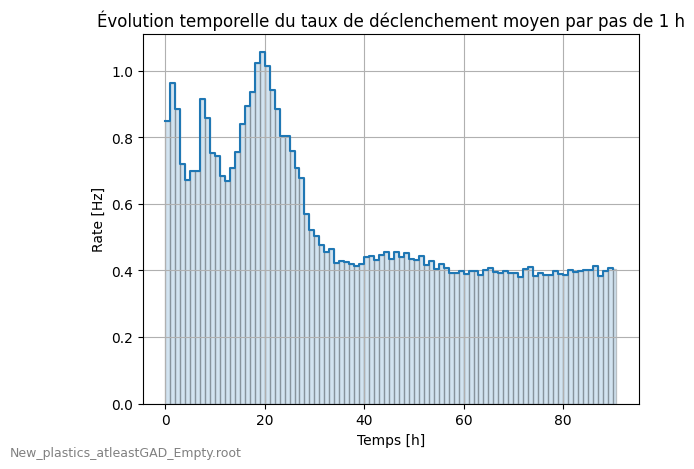

In [805]:
sub_df, durations, t, rate = fct.split_in_sub_df(df_clean, delta_t=Delta_T, show_sub_df=False,
                                                 show_abstract=False, plot_rate_var=True, txt_to_show=f"{rootfile_use}")

First group event at : 852338660.0 ns ~ 0.85 s ~ 0.01 min 
Last  group event at : 326443615392408.0 ns ~ 326443.62 s ~ 5440.73 min ~ 90.68 h
There is 91 sub_df in total
Name       |       Start [s] |        Stop [s] |  Events | Duration [s] |  Rate [Hz] |      Error |
----------------------------------------------------------------------------------------------------
Entire df  |          0.8523 |     326443.6154 |  176675 |  326442.7631 |     0.5412 |     0.0013 |
----------------------------------------------------------------------------------------------------


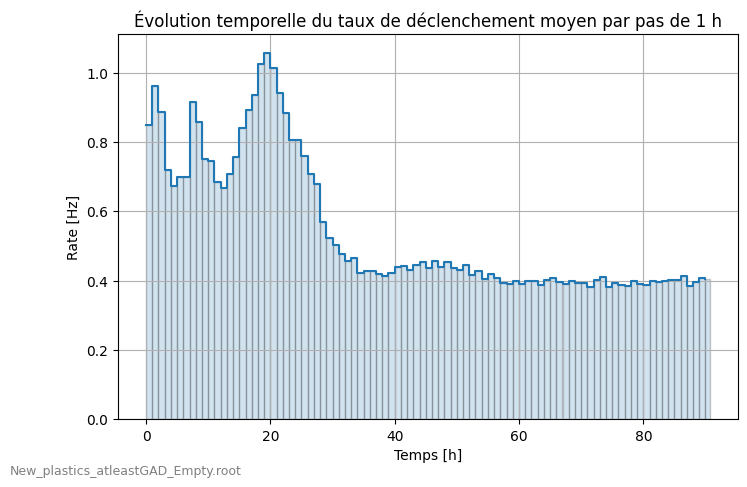

In [806]:
sub_df_v2, durations_v2, t_v2, rate_v2 = fct.split_in_sub_df_v2(df_clean, delta_t=Delta_T, show_sub_df=False,
                                                 show_abstract= False, save_abstract=False, plot_rate_var=True, txt_to_show=f"{rootfile_use}",save_dir=save_dir_path,filename=f"rate_variation_{rootfile_use}")

# Verification des résultats donnés par la fonction améliorée

In [807]:
"""for i in sub_df.keys():
    if sub_df[i].equals(sub_df_v2[i]):
        print(f"sub_df[{i}] identique")""" 

'for i in sub_df.keys():\n    if sub_df[i].equals(sub_df_v2[i]):\n        print(f"sub_df[{i}] identique")'

# Evolution du taux de comptage sur les scintillateurs

In [808]:
print(df_clean.filter(like="Counter").head())

   Counter_2  Counter_4  Counter_5  Counter_6  Counter_7  Counter_sum  \
0          0          1          1          1          1            3   
1          0          0          1          1          1            3   
2          0          0          1          1          1            3   
3          0          0          1          1          1            3   
4          0          0          1          1          1            3   

   Counter_mult_2  Counter_mult_4  Counter_mult_5  Counter_mult_6  \
0               0               1               1               4   
1               0               0               1               1   
2               0               0               1               1   
3               0               0               1               1   
4               0               0               1               2   

   Counter_mult_7  Counter_mult_sum  
0               4                 9  
1               1                 3  
2               1               

In [809]:
df_ch2 = df_clean[(df_clean["Counter_mult_2"] != 0)]

df_ch4 = df_clean[(df_clean["Counter_mult_4"] != 0)]

sub_df_ch2, durations_ch2, t_ch2, rate_ch2 = fct.split_in_sub_df(df_ch2, delta_t=Delta_T, show_sub_df=False,
                                        show_abstract=False, plot_rate_var=False, txt_to_show=f"{rootfile_use}") 

sub_df_ch4, durations_ch4, t_ch4, rate_ch4 = fct.split_in_sub_df(df_ch4, delta_t=Delta_T, show_sub_df=False,
                                        show_abstract=False, plot_rate_var=False, txt_to_show=f"{rootfile_use}") 




First group event at : 28427203904.0 ns = 28.427203904000002 s = 0.47378673173333335 min 
Last  group event at : 326436997103656.0 ns = 326436.997103656 s = 5440.616618394267 min = 90.67694363990445 h
There is 91 sub_df in total
Name       |       Start [s] |        Stop [s] |  Events | Duration [s] |  Rate [Hz] |      Error |
----------------------------------------------------------------------------------------------------
Entire df  |         28.4272 |     326436.9971 |   14197 |  326408.5699 |     0.0435 |     0.0004 |
----------------------------------------------------------------------------------------------------
First group event at : 852338660.0 ns = 0.85233866 s = 0.014205644333333333 min 
Last  group event at : 326419283339576.0 ns = 326419.28333957604 s = 5440.321388992934 min = 90.67202314988224 h
There is 91 sub_df in total
Name       |       Start [s] |        Stop [s] |  Events | Duration [s] |  Rate [Hz] |      Error |
-----------------------------------------------

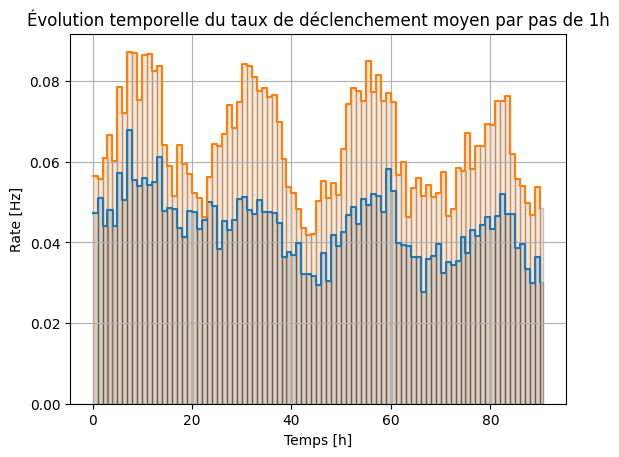

In [810]:
plt.bar(t_ch2/3600, rate_ch2, width=durations/(10**9*3600), align="edge", alpha=0.2, edgecolor="black")
plt.step(t_ch2/3600, rate_ch2, where="post")#,marker=".",color="red")

plt.bar(t_ch4/3600, rate_ch4, width=durations/(10**9*3600), align="edge", alpha=0.2, edgecolor="black")
plt.step(t_ch4/3600, rate_ch4, where="post")#,marker=".",color="red")

plt.xlabel("Temps [h]")
plt.ylabel("Rate [Hz]")
plt.title(f"Évolution temporelle du taux de déclenchement moyen par pas de 1h")
plt.grid()
plt.show()    

First group event at : 12040624368.0 ns = 12.040624368000001 s = 0.20067707280000002 min 
Last  group event at : 326436997103656.0 ns = 326436.997103656 s = 5440.616618394267 min = 90.67694363990445 h
There is 91 sub_df in total
Name       |       Start [s] |        Stop [s] |  Events | Duration [s] |  Rate [Hz] |      Error |
----------------------------------------------------------------------------------------------------
Entire df  |         12.0406 |     326436.9971 |   71949 |  326424.9565 |     0.2204 |     0.0008 |
----------------------------------------------------------------------------------------------------
First group event at : 852338660.0 ns = 0.85233866 s = 0.014205644333333333 min 
Last  group event at : 326443615392408.0 ns = 326443.61539240804 s = 5440.726923206801 min = 90.67878205344668 h
There is 91 sub_df in total
Name       |       Start [s] |        Stop [s] |  Events | Duration [s] |  Rate [Hz] |      Error |
-----------------------------------------------

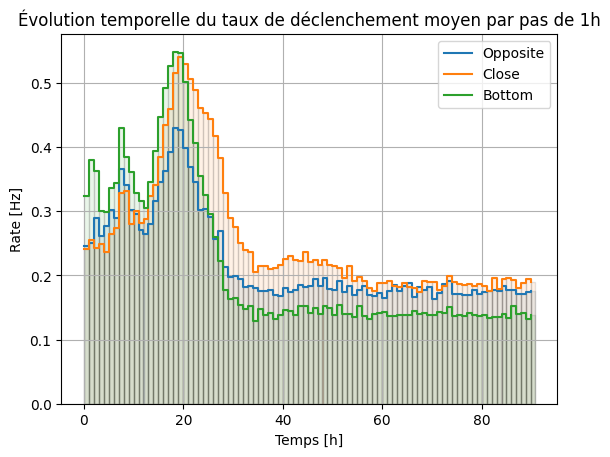

In [811]:
mult = 1

df_ch5 = df_clean[(df_clean["Counter_mult_5"] > mult)]

df_ch6 = df_clean[(df_clean["Counter_mult_6"] > mult)]

df_ch7 = df_clean[(df_clean["Counter_mult_7"] > mult)]

sub_df_ch5, durations_ch5, t_ch5, rate_ch5 = fct.split_in_sub_df(df_ch5, delta_t=Delta_T, show_sub_df=False,
                                        show_abstract=False, plot_rate_var=False, txt_to_show=f"{rootfile_use}") 

sub_df_ch6, durations_ch6, t_ch6, rate_ch6 = fct.split_in_sub_df(df_ch6, delta_t=Delta_T, show_sub_df=False,
                                        show_abstract=False, plot_rate_var=False, txt_to_show=f"{rootfile_use}") 

sub_df_ch7, durations_ch7, t_ch7, rate_ch7 = fct.split_in_sub_df(df_ch7, delta_t=Delta_T, show_sub_df=False,
                                        show_abstract=False, plot_rate_var=False, txt_to_show=f"{rootfile_use}") 


plt.bar(t_ch5/3600, rate_ch5, width=durations/(10**9*3600), align="edge", alpha=0.1, edgecolor="black")
plt.step(t_ch5/3600, rate_ch5, where="post", label="Opposite")#,marker=".",color="red")

plt.bar(t_ch6/3600, rate_ch6, width=durations/(10**9*3600), align="edge", alpha=0.1, edgecolor="black")
plt.step(t_ch6/3600, rate_ch6, where="post",label="Close")#,marker=".",color="red")

plt.bar(t_ch7/3600, rate_ch7, width=durations/(10**9*3600), align="edge", alpha=0.1, edgecolor="black")
plt.step(t_ch7/3600, rate_ch7, where="post", label="Bottom")#,marker=".",color="red")


plt.xlabel("Temps [h]")
plt.ylabel("Rate [Hz]")
plt.title(f"Évolution temporelle du taux de déclenchement moyen par pas de 1h")
plt.legend()
plt.grid()
plt.show() 

# Tracé des Ternary_plot et PSA pour CHAQUES sub_df 

--> Attention à len(sub_df), s'il est trés grand on plot un trés grand nombre de figures, ce qui peut prendre beaucoup d'espace mémoire. Penser à prendre un pas résonable de plusieurs heures.

In [812]:
if len(sub_df)<10:
    
    for i in range(len(sub_df)):
        
        fct.plot_dalitz_triangle_scat(sub_df[i], df_clean, rootfile=f'{rootfile_use} & sub_df{i} with $\Delta$t={Delta_T}h', subdivisions=4, Gain_norm=[4.64*10**7, 5.20*10**7, 3.85*10**7], Title="Charge repartition ternary plot", charge_interval=None, save_dir=save_dir_path, filename=f"Ternary_{rootfile_use}_DeltaT{Delta_T}h_subdf{i}")
        fct.plot_amp_ratio_hist2D(sub_df[i], label='PSA', rootfile=f'{rootfile_use} & sub_df{i} with $\Delta$t={Delta_T}h', save_dir=save_dir_path, filename=f"Pulse_shape_{rootfile_use}_DeltaT{Delta_T}h_subdf{i}")

In [813]:
"""i=22
fct.hist_567_compare_q(sub_df[i],sub_df[i+1])"""

'i=22\nfct.hist_567_compare_q(sub_df[i],sub_df[i+1])'

# Tracé du Ternary_plot et PSA pour df_clean

NameError: name 'col_grt' is not defined

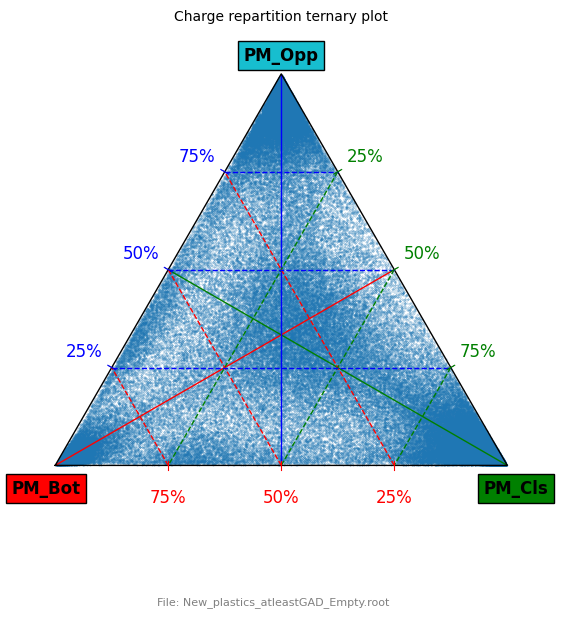

In [814]:
fct.plot_dalitz_triangle_scat(df_clean, df_clean, rootfile=f'{rootfile_use}', subdivisions=4, Gain_norm=[4.64*10**7, 5.20*10**7, 3.85*10**7], Title="Charge repartition ternary plot", charge_interval=None, save_dir=save_dir_path, filename=f"Ternary_{rootfile_use}")
fct.plot_amp_ratio_hist2D(df_clean, label='PSA', rootfile=f'{rootfile_use}', save_dir=save_dir_path, filename=f"Pulse_shape_{rootfile_use}")